In [ ]:
#Assignment 1 - Predict Startup Profit using Regression

In [135]:
import matplotlib.pyplot as plt #Matplotlibfor plots
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder #State variable
from sklearn.metrics import mean_squared_error, r2_score #Model Fitness check Metrics
import numpy as np

In [7]:
data = pd.read_csv("C:/Users/Welcome/Downloads/50_Startups.csv")
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


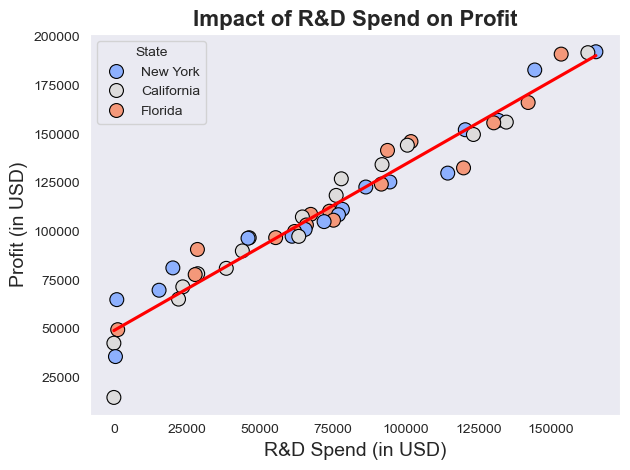

In [47]:



sns.set_style("dark")

sns.scatterplot(
    x='R&D Spend',
    y='Profit', 
    data=data, 
    hue='State', 
    palette='coolwarm',  
    s=100,  
    edgecolor='black'
)


sns.regplot(
    x='R&D Spend', 
    y='Profit', 
    data=data, 
    scatter=False, 
    color='red', 
    ci=0.95  
)


plt.title("Impact of R&D Spend on Profit", fontsize=16, fontweight='bold')
plt.xlabel("R&D Spend (in USD)", fontsize=14)
plt.ylabel("Profit (in USD)", fontsize=14)


plt.tight_layout()
plt.show()





In [68]:
#preprocessing
print("RowsXcolumns\n",data.shape)
print("Null check\n",data.isna().sum())
print("Data Types\n",data.dtypes)


RowsXcolumns
 (50, 6)
Null check
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
State Code         0
dtype: int64
Data Types
 R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
State Code           int32
dtype: object


In [179]:



d=pd.get_dummies(data=data['State'])
data = pd.concat([data,d],axis = 'columns')
print(data.head())


   R&D Spend  Administration  Marketing Spend       State     Profit  \
0  165349.20       136897.80        471784.10    New York  192261.83   
1  162597.70       151377.59        443898.53  California  191792.06   
2  153441.51       101145.55        407934.54     Florida  191050.39   
3  144372.41       118671.85        383199.62    New York  182901.99   
4  142107.34        91391.77        366168.42     Florida  166187.94   

   California  Florida  New York  
0       False    False      True  
1        True    False     False  
2       False     True     False  
3       False    False      True  
4       False     True     False  


In [198]:
#Train test split
print("RowsXcolumns\n",data.shape)
X = data.drop(columns=['Profit',"State","New York"])
y = data['Profit']
X = X.values  
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("RowsXcolumns(After split)\n",X_train.shape,"\n",y_train.shape)

RowsXcolumns
 (50, 8)
RowsXcolumns(After split)
 (40, 5) 
 (40,)


In [199]:
#Fit Model MLR
lr = LinearRegression()

lr.fit(X_train, y_train)

y_predicted_profits = lr.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_predicted_profits)
r2_multiple = r2_score(y_test, y_predicted_profits)

print("\nMultiple Linear Regression")
print(f"Mean Squared Error: {mse_multiple:.2f}")
print(f"R² Score: {r2_multiple:.4f}")
print("Intercept:",lr.intercept_)
lr.predict(X[0:5])



Multiple Linear Regression
Mean Squared Error: 82010363.04
R² Score: 0.8987
Intercept: 54035.02735368935


array([191913.72740385, 187861.47839014, 183805.40426658, 173623.19035613,
       174098.25202596])

      Actual      Predicted
0  134307.35  126362.879083
1   81005.76   84608.453836
2   99937.59   99677.494251
3   64926.08   46357.460686
4  125370.37  128750.482885


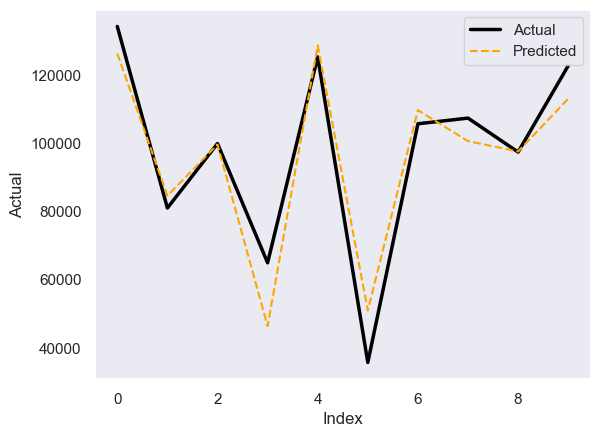

In [200]:
#predictedVsActuual


predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted_profits})
print(predictions.head())
sns.set(style="dark")
predictions['Index'] = range(len(predictions))
sns.lineplot(data=predictions, x='Index', y='Actual', label='Actual', color='black', linewidth=2.5)
sns.lineplot(data=predictions, x='Index', y='Predicted', label='Predicted', color='orange', linestyle='--')


plt.show()

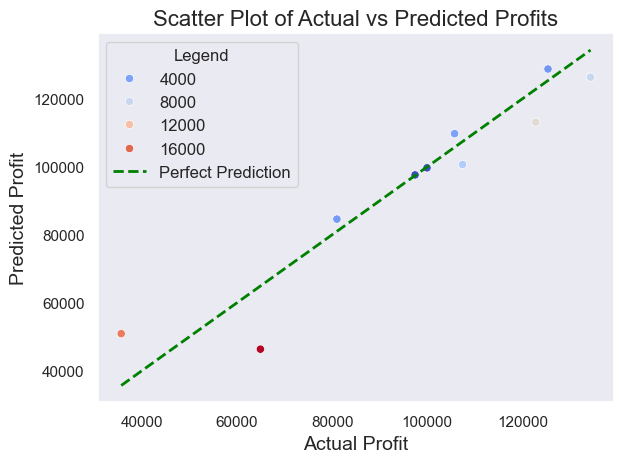

In [201]:
predictions['Error'] = abs(predictions['Actual'] - predictions['Predicted'])


sns.scatterplot(
    data=predictions,
    x='Actual',
    y='Predicted',hue='Error',  
    palette='coolwarm',
    
)


plt.plot(
    [predictions['Actual'].min(), predictions['Actual'].max()],
    [predictions['Actual'].min(), predictions['Actual'].max()],
    color='green', linestyle='--', linewidth=2, label='Perfect Prediction'
)


plt.title("Scatter Plot of Actual vs Predicted Profits", fontsize=16)
plt.xlabel("Actual Profit", fontsize=14)
plt.ylabel("Predicted Profit", fontsize=14)
plt.legend(title="Legend", fontsize=12)
plt.tight_layout()




plt.show()


In [216]:

print("Location 1 Profit:",lr.predict([[160000,130000,470000,0,1]]))#Prediction same parameters different locations
print("Location 2 Profit:",lr.predict([[160000,130000,470000,1,0]]))
print("Model Strength:",lr.score(X,y))

Location 1 Profit: [188957.27627186]
Location 2 Profit: [188018.48326571]
Model Strength: 0.949649958272419


In [218]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)


In [222]:
with open('model.pkl', 'rb') as f:
    finalmodel = pickle.load(f)
finalmodel    

LinearRegression()